# XGBoost with Per SF Analysis

## Setup

In [17]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import shap

%matplotlib inline

In [18]:
# Load data
data = pd.read_csv('data/ames_xgb.csv')

In [19]:
# Check columns
column_names = data.columns
for column in column_names:
    print(column)

GrLivArea
SalePrice
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Remod
YrSoldLessBuilt
YrSoldLessRemod
Crisis
MSZoning_A (agr)
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
N

In [20]:
# Check info
print(data.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 279 entries, GrLivArea to MSSubClass_90
dtypes: float64(11), int64(268)
memory usage: 5.5 MB
None


In [21]:
# View data
data.head(10)

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,856,126000,0.0,7890,6,6,0.0,3,3,238.0,...,1,0,0,0,0,0,0,0,0,0
1,1049,139500,42.0,4235,5,5,149.0,4,3,552.0,...,0,0,0,0,0,0,0,0,0,0
2,1001,124900,60.0,6060,5,9,0.0,4,3,737.0,...,1,0,0,0,0,0,0,0,0,0
3,1039,114000,80.0,8146,4,8,0.0,4,4,0.0,...,0,0,0,0,0,1,0,0,0,0
4,1665,227000,70.0,8400,8,6,0.0,4,3,643.0,...,0,0,0,0,1,0,0,0,0,0
5,1922,198500,64.0,7301,7,5,500.0,4,3,0.0,...,0,0,0,0,0,0,0,0,1,0
6,936,93000,60.0,6000,4,4,0.0,2,3,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1246,187687,53.0,3710,7,5,20.0,4,3,0.0,...,0,0,0,0,0,0,0,0,0,0
8,889,137500,74.0,12395,5,6,0.0,3,3,647.0,...,0,0,0,0,0,0,0,0,0,0
9,1072,140000,35.0,3675,6,5,76.0,3,3,467.0,...,0,0,0,0,0,0,0,0,0,0


## Data Prep and EDA

In [22]:
# Create linear regression object
lr = LinearRegression()

#### Analyze SalePrice per SF

In [23]:
# Create TotalSF feature
data['TotalSF'] = data['TotalBsmtSF'] - data['BsmtUnfSF'] + data['GrLivArea']

In [24]:
# Create SalePricePerSF variable
data['SalePricePerSF'] = data['SalePrice'] / data['TotalSF']

(array([  4.,   8.,  46., 130., 270., 429., 518., 380., 227., 186., 148.,
         92.,  59.,  35.,  24.,  12.,   2.,   3.,   0.,   3.]),
 array([ 26.30111524,  35.35472307,  44.40833091,  53.46193874,
         62.51554657,  71.5691544 ,  80.62276224,  89.67637007,
         98.7299779 , 107.78358573, 116.83719357, 125.8908014 ,
        134.94440923, 143.99801706, 153.0516249 , 162.10523273,
        171.15884056, 180.21244839, 189.26605622, 198.31966406,
        207.37327189]),
 <BarContainer object of 20 artists>)

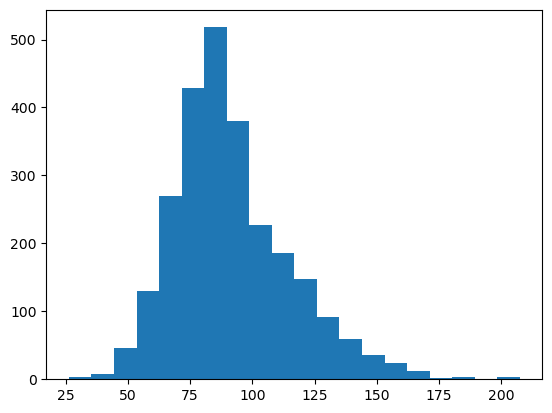

In [25]:
# Plot the 
plt.hist(data['SalePricePerSF'], bins=20)

(array([  2.,   1.,   1.,   3.,   5.,  16.,  41.,  81., 129., 288., 389.,
        493., 383., 270., 208., 142.,  77.,  37.,   6.,   4.]),
 array([3.26961134, 3.3728568 , 3.47610225, 3.5793477 , 3.68259316,
        3.78583861, 3.88908406, 3.99232952, 4.09557497, 4.19882043,
        4.30206588, 4.40531133, 4.50855679, 4.61180224, 4.71504769,
        4.81829315, 4.9215386 , 5.02478405, 5.12802951, 5.23127496,
        5.33452042]),
 <BarContainer object of 20 artists>)

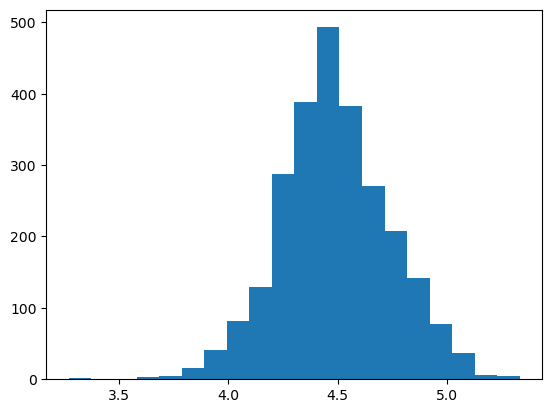

In [26]:
# Plot log(target)
plt.hist(np.log(data['SalePricePerSF']), bins=20)

#### Analyze GrLivArea vs. SalePricePerSF

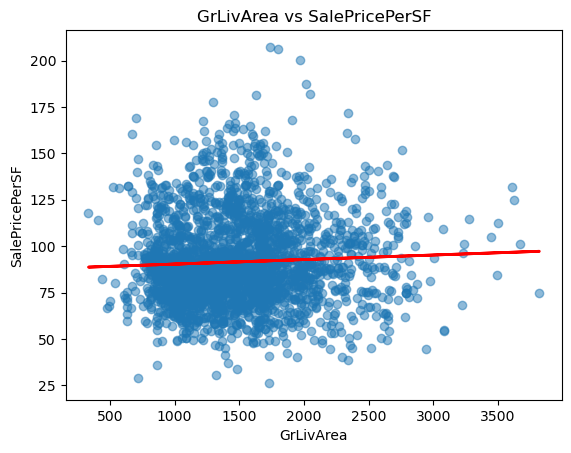

R^2 = 0.002502402572396756


In [27]:
# Fit the model
lr.fit(data[['GrLivArea']], data['SalePricePerSF'])

# Create scatter plot
plt.scatter(data['GrLivArea'], data['SalePricePerSF'], alpha=0.5)

# Plot the regression line
plt.plot(data['GrLivArea'], lr.predict(data[['GrLivArea']]), color='red', linewidth=2)

# Label the plot
plt.title('GrLivArea vs SalePricePerSF')
plt.xlabel('GrLivArea')
plt.ylabel('SalePricePerSF')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(data[['GrLivArea']], data['SalePricePerSF'])}")

#### Analyze Crisis vs. SalePricePerSF

In [29]:
# Check the 'Crisis' feature
print(data['Crisis'].value_counts())

1    1646
0     930
Name: Crisis, dtype: int64


<AxesSubplot:xlabel='Crisis', ylabel='SalePricePerSF'>

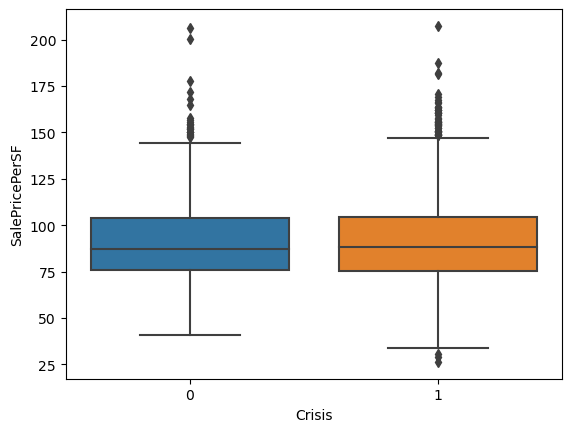

In [30]:
# Boxplot of SalePricePerSF vs. Crisis
sns.boxplot(x='Crisis', y='SalePricePerSF', data=data)

In [31]:
# Fit the model
lr.fit(data[['Crisis']], data['SalePricePerSF'])

# Print the R^2 score
print(f"R^2 = {lr.score(data[['Crisis']], data['SalePricePerSF'])}")

R^2 = 7.038302611861447e-05


Text(0.5, 1.0, 'SalePricePerSF Over Time')

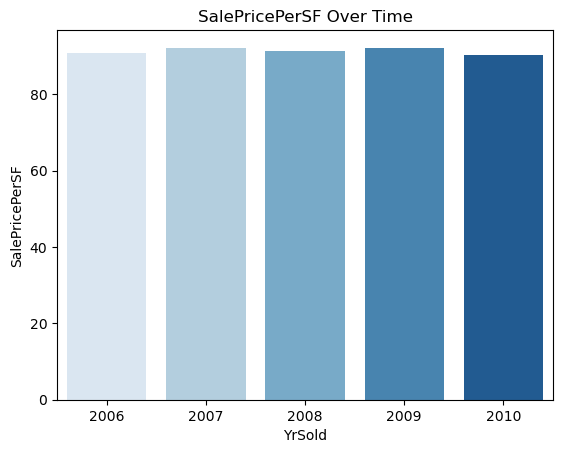

In [37]:
# Barplot SalePricePerSF over time
sns.barplot(x='YrSold', y='SalePricePerSF', data=data, palette='Blues', ci=None)

# Add a title
plt.title('SalePricePerSF Over Time')

## Split Train-Test Sets

In [38]:
# Create the predictors and the target
predictors = data.drop(['SalePrice', 'SalePricePerSF'], axis=1)
target = data['SalePricePerSF']

In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=0, test_size = 0.2)

In [41]:
# Check training set features
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,TotalSF
1138,1792,80.0,12435,7,5,172.0,4,3,361.0,0.0,...,0,0,0,1,0,0,0,0,0,2153.0
411,864,0.0,8499,5,6,0.0,3,3,660.0,0.0,...,0,0,0,0,0,0,0,0,0,1524.0
2301,1595,60.0,7200,6,8,0.0,3,5,338.0,0.0,...,0,0,0,0,1,0,0,0,0,1933.0
1697,1692,0.0,9337,7,5,0.0,3,3,353.0,0.0,...,0,0,0,1,0,0,0,0,0,2045.0
1347,1720,65.0,10816,9,5,364.0,5,3,1104.0,0.0,...,0,0,0,0,0,0,0,0,0,2824.0


In [42]:
# Check training set target
y_train.head()

1138    107.524385
411      92.519685
2301     80.444904
1697     93.398533
1347    117.563739
Name: SalePricePerSF, dtype: float64

In [43]:
# Check test set features
X_test.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,TotalSF
2469,1647,75.0,9532,4,6,0.0,3,3,595.0,354.0,...,0,0,0,0,0,0,0,0,0,2596.0
1942,1680,78.0,10140,7,5,0.0,4,3,144.0,1127.0,...,0,0,0,0,0,0,0,0,0,2951.0
1774,1479,0.0,13517,6,8,289.0,4,3,533.0,0.0,...,0,0,0,1,0,0,0,0,0,2012.0
2229,1144,70.0,8163,5,6,128.0,3,4,748.0,294.0,...,0,0,0,0,0,0,1,0,0,2186.0
1635,1657,43.0,14565,7,5,145.0,4,3,537.0,0.0,...,0,0,0,1,0,0,0,0,0,2194.0


In [44]:
# Check test set target
y_test.head()

2469    58.936826
1942    72.263639
1774    64.860835
2229    65.416285
1635    86.144029
Name: SalePricePerSF, dtype: float64

In [45]:
# Check dimensions of training set
print(X_train.shape)
print(y_train.shape)

# Check dimensions of test set
print(X_test.shape)
print(y_test.shape)

(2060, 279)
(2060,)
(516, 279)
(516,)


## Train Model

In [46]:
# Initialize a XGBRegressor object
xgbr = xgb.XGBRegressor()

In [47]:
# Define the grid of hyperparameters to search
params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'alpha': [0, 10, 20],
    'n_estimators': [10, 50, 100, 200],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'objective': ['reg:squarederror']
}

In [48]:
# Initialize a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgbr, 
                           param_grid=params, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           verbose=1, 
                           n_jobs=-1)

In [49]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0,

In [50]:
# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'alpha': 20, 'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}


## Evaluate Model

In [51]:
# Initialize a new XGBoost regressor using the best parameters
best_xgbr = xgb.XGBRegressor(**best_params)

In [52]:
# Fit the best XGBoost regressor to the data
best_xgbr.fit(X_train, y_train)

XGBRegressor(alpha=20, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [53]:
# Predict the train set
y_pred_train = best_xgbr.predict(X_train)

# Compute the R^2 score for the train set
r2_train = r2_score(y_train, y_pred_train)
print(f'R^2 score: {r2_train}')

R^2 score: 0.9481766771095269


In [54]:
# Predict the test set
y_pred_test = best_xgbr.predict(X_test)

# Compute the R^2 score for the test set
r2_test = r2_score(y_test, y_pred_test)
print(f'R^2 score: {r2_test}')

R^2 score: 0.8596306722095644


## Feature Importances

In [55]:
# List top 5 features
importances = best_xgbr.feature_importances_
feature_importances = pd.DataFrame({'Feature': predictors.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(5))

               Feature  Importance
182   BsmtFinType1_Unf    0.093799
106  HouseStyle_1Story    0.066572
101    BldgType_Duplex    0.052776
6            ExterQual    0.051926
23         GarageYrBlt    0.050726


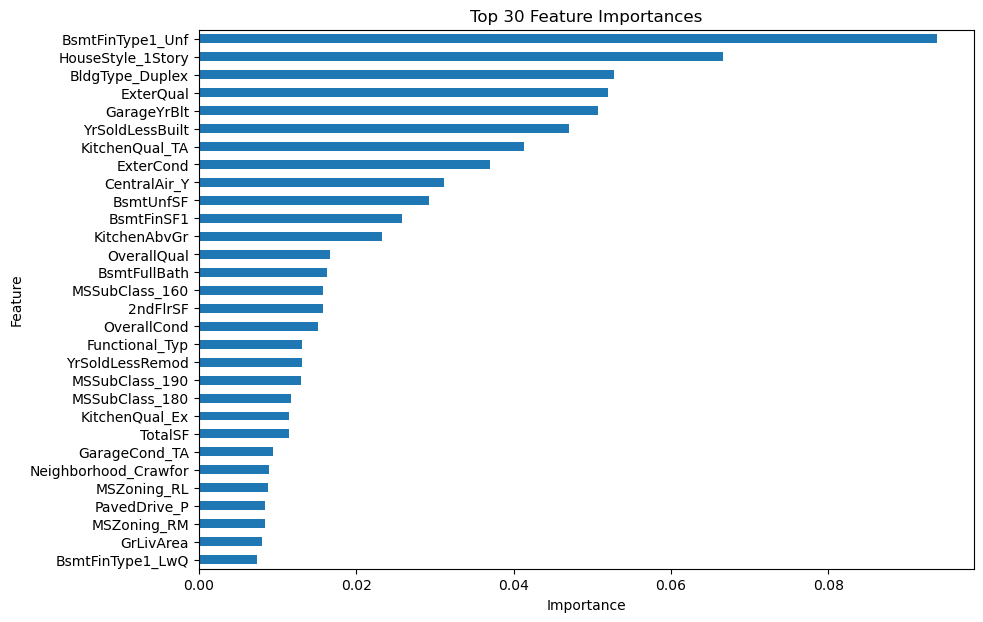

In [56]:
# Select the top 30 features
feature_importances_top_30 = feature_importances.head(30)

# Plot the bar chart
feature_importances_top_30.set_index('Feature')['Importance'].sort_values().plot(kind='barh', figsize=(10,7))
plt.title("Top 30 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Show the plot
plt.show()


## Shapley Values

In [57]:
# Compute the SHAP values
explainer = shap.TreeExplainer(best_xgbr)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [58]:
# Summarize the SHAP values in a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,TotalSF
0,-1.182109,0.301229,1.221788,2.312322,-0.996339,-0.397317,1.615365,0.027081,-0.465688,0.500040,...,0.0,0.0,0.0,0.119381,0.0,0.0,-0.003062,-0.003469,0.0,-3.200783
1,2.830184,0.263854,0.010060,-2.414490,1.161986,-0.175545,-0.674860,0.069254,-2.551367,0.621176,...,0.0,0.0,0.0,-0.030238,0.0,0.0,-0.004181,-0.007513,0.0,3.465024
2,-0.908574,-0.173231,-0.900784,-0.548133,6.693567,-0.167826,-1.477935,0.069254,0.441754,0.534516,...,0.0,0.0,0.0,-0.012403,0.0,0.0,-0.004181,-0.008807,0.0,-1.011778
3,-1.477265,-0.101637,0.596554,2.334004,-1.124386,-0.447583,-1.098252,0.027081,0.109136,0.518238,...,0.0,0.0,0.0,0.119381,0.0,0.0,-0.003062,-0.008698,0.0,-3.092601
4,-1.116228,-0.158301,0.034747,13.608974,-0.576525,1.165175,7.331533,0.027081,-8.147696,0.619388,...,0.0,0.0,0.0,-0.023481,0.0,0.0,-0.003526,-0.008698,0.0,-6.554359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,-2.529391,-0.314605,-7.119728,1.945966,-1.086656,-0.301216,1.232104,0.027081,4.833517,0.529647,...,0.0,0.0,0.0,-0.030238,0.0,0.0,-0.004181,-0.003442,0.0,2.602775
2056,-1.521924,0.341314,0.717089,-0.668196,-0.854868,-0.199901,-0.997033,0.069254,5.072912,0.453589,...,0.0,0.0,0.0,0.067119,0.0,0.0,-0.003062,-0.008698,0.0,2.779131
2057,-0.035091,-0.332967,-6.533426,3.576433,4.272461,-0.113148,-1.009493,0.027081,4.906646,0.457660,...,0.0,0.0,0.0,0.067119,0.0,0.0,-0.003062,-0.002681,0.0,5.063542
2058,2.856241,-0.342454,-1.455442,-2.577927,0.884719,-0.109262,-0.767010,0.069254,-2.399637,0.595082,...,0.0,0.0,0.0,-0.030238,0.0,0.0,-0.004181,-0.002681,0.0,3.440244


In [59]:
# Get the mean absolute SHAP values for each fature
mean_shap_values = np.abs(shap_df).mean().sort_values(ascending=False)

In [60]:
# Print the top 5 features
print(mean_shap_values.head(5))

TotalSF            4.662001
BsmtUnfSF          4.442168
OverallQual        3.768009
YrSoldLessBuilt    3.665967
BsmtFinSF1         3.551248
dtype: float32


In [61]:
# Print total number of features
print("Total number of features: ", len(mean_shap_values))

Total number of features:  279


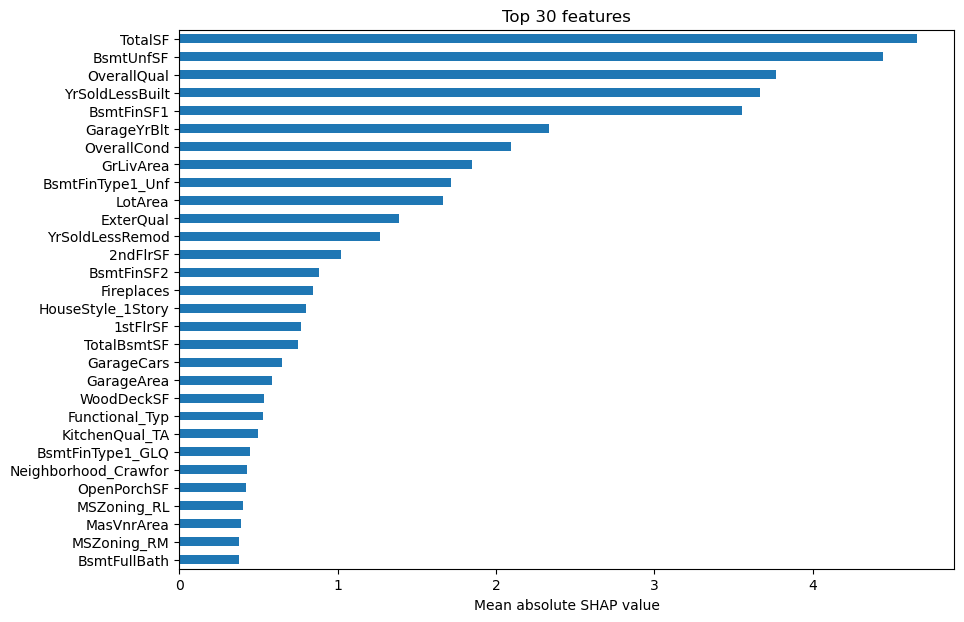

In [62]:
# Plot the top 30 features
mean_shap_values.head(30).plot(kind='barh', figsize=(10, 7))
plt.xlabel('Mean absolute SHAP value')
plt.title('Top 30 features')
plt.gca().invert_yaxis()
plt.show()